In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer_chun_dataset.csv')
df.info() # Data reloaded to ensure fresh state

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
# droping Customer IDs
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
# Traget Variable
#df["Churn"]= df["Churn"].map({'Yes':1,'No':0}) # This line caused NaNs, as Churn was already 0/1
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
# Categorical cloumns
from sklearn.preprocessing import LabelEncoder, StandardScaler

for col in df.select_dtypes(include="object"):
  df[col] = LabelEncoder().fit_transform(df[col])
  df.head()

In [ ]:
# Feature Scaling

scaler = StandardScaler()
features_to_scale = [col for col in df.columns if col != 'Churn']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

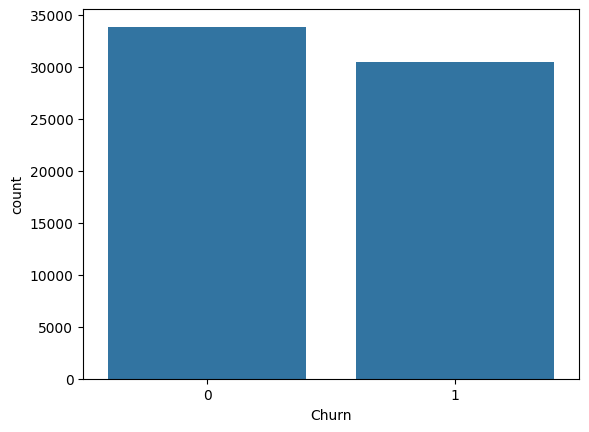

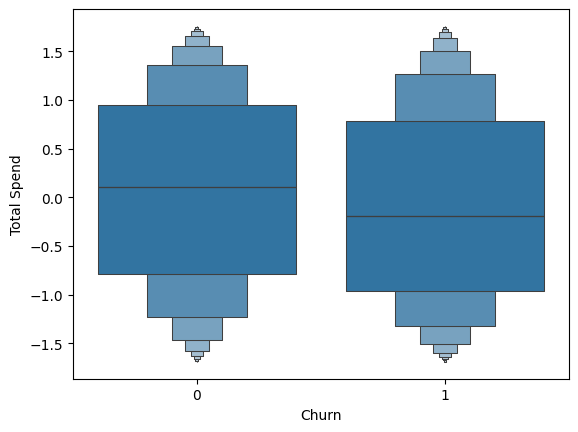

In [ ]:
sns.countplot(x = 'Churn', data = df)
plt.show()

sns.boxenplot(x='Churn',y='Total Spend',data=df)
plt.show()

In [ ]:
# Drop rows where the target variable 'Churn' is NaN
df_cleaned = df.dropna(subset=['Churn'])

X = df_cleaned.drop("Churn", axis=1)
y = df_cleaned["Churn"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                64374 non-null  float64
 1   Gender             64374 non-null  float64
 2   Tenure             64374 non-null  float64
 3   Usage Frequency    64374 non-null  float64
 4   Support Calls      64374 non-null  float64
 5   Payment Delay      64374 non-null  float64
 6   Subscription Type  64374 non-null  float64
 7   Contract Length    64374 non-null  float64
 8   Total Spend        64374 non-null  float64
 9   Last Interaction   64374 non-null  float64
dtypes: float64(10)
memory usage: 4.9 MB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 64374 entries, 0 to 64373
Series name: Churn
Non-Null Count  Dtype
--------------  -----
64374 non-null  int64
dtypes: int64(1)
memory usage: 503.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [ ]:
# model training LogisticRegression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[5639 1154]
 [1027 5055]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_predication = model.predict(X_test)
print(accuracy_score(y_test,y_predication))
print(classification_report(y_test,y_predication))

0.9994563106796116
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

